# Glass

In [20]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass.csv


In [4]:
glass = pd.read_csv('glass.csv')
glass.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [6]:
glass.sample(5)

RI     Na    Mg    Al     Si     K     Ca   Ba    Fe  Type
133  1.51800  13.71  3.93  1.54  71.81  0.54   8.21  0.0  0.15     2
151  1.52127  14.32  3.90  0.83  71.50  0.00   9.49  0.0  0.00     3
48   1.52223  13.21  3.77  0.79  71.99  0.13  10.02  0.0  0.00     1
108  1.52222  14.43  0.00  1.00  72.67  0.10  11.52  0.0  0.08     2
175  1.52119  12.97  0.33  1.51  73.39  0.13  11.27  0.0  0.28     5

In [5]:
glass.shape

(214, 10)

In [7]:
X = glass.iloc[:,:-1]
Y = glass.iloc[:,-1]

In [8]:
kfold = KFold(n_splits = 10)

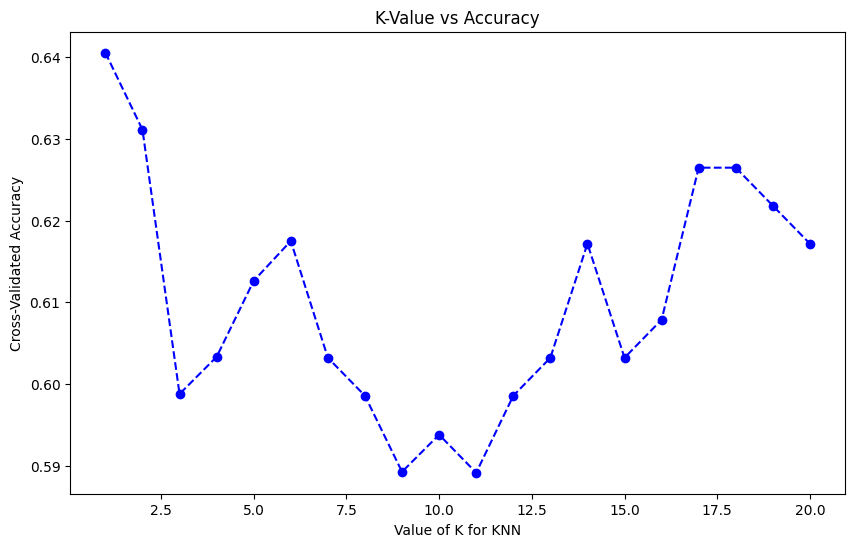

In [14]:
# K Value vs Accuracy Plot

# Test different values of k
k_range = range(1, 21)
k_scores = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    results = cross_val_score(model, X, Y, cv=5)
    k_scores.append(results.mean())

# Plot K vs Accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K-Value vs Accuracy')
plt.show()

In [27]:
model = KNeighborsClassifier(n_neighbors = 1)
results = cross_val_score(model,X,Y,cv = kfold)
print(results)
print(results.mean())

[0.5        0.59090909 0.5        0.81818182 0.38095238 0.66666667
 0.42857143 0.47619048 0.28571429 0.95238095]
0.5599567099567099


In [28]:
model = KNeighborsClassifier(n_neighbors = 8)
results = cross_val_score(model,X,Y,cv = kfold)
print(results)
print(results.mean())

[0.5        0.77272727 0.63636364 0.77272727 0.33333333 0.52380952
 0.38095238 0.         0.14285714 0.14285714]
0.42056277056277064


In [29]:
model = KNeighborsClassifier(n_neighbors = 16)
results = cross_val_score(model,X,Y,cv = kfold)
print(results)
print(results.mean())

[0.5        0.90909091 0.72727273 0.90909091 0.23809524 0.57142857
 0.47619048 0.         0.14285714 0.04761905]
0.4521645021645022


In [25]:
model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model,X,Y,cv = kfold)
print(results)
print(results.mean())

[0.5        0.81818182 0.72727273 0.90909091 0.19047619 0.52380952
 0.42857143 0.         0.14285714 0.04761905]
0.42878787878787883


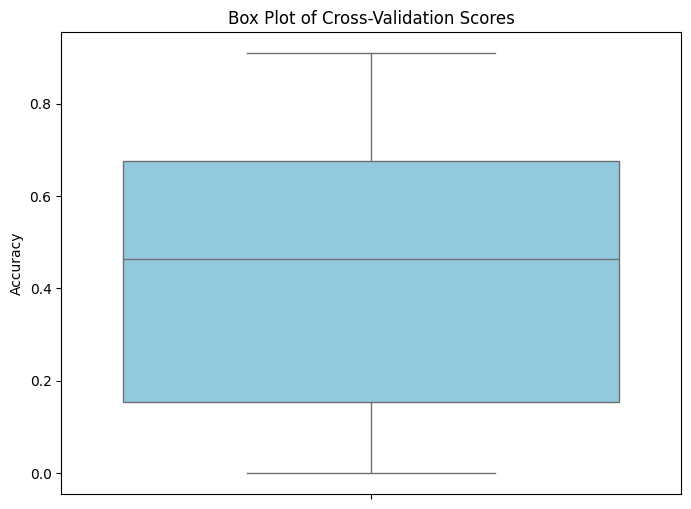

In [26]:
# Box Plot of Cross-Validation Scores
plt.figure(figsize=(8, 6))
sns.boxplot(results, color='skyblue')
plt.title('Box Plot of Cross-Validation Scores')
plt.ylabel('Accuracy')
plt.show()

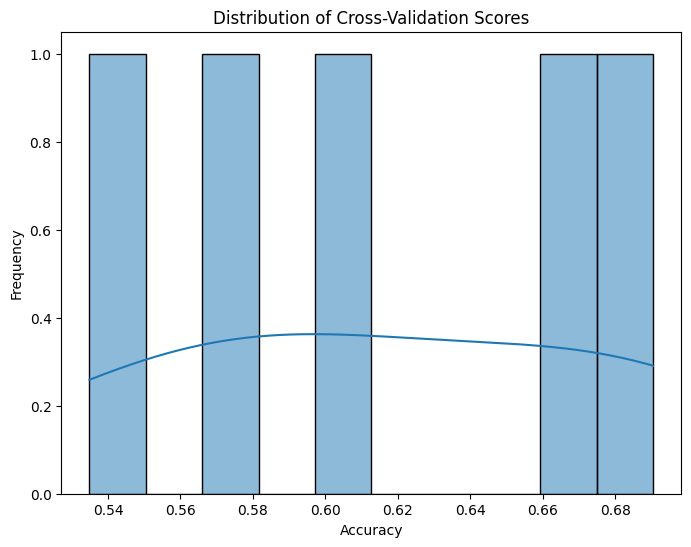

In [15]:
# Cross validation result distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the cross-validation results
plt.figure(figsize=(8, 6))
sns.histplot(results, kde=True, bins=10)
plt.title('Distribution of Cross-Validation Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Grid Search for n_neighbors tuning
n_neighbors = np.array(range(1,50))
param_grid = dict(n_neighbors = n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


In [ ]:
k_range = range(1, 50)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv = 10)
    k_scores.append(scores.mean())

pd.Series(k_scores).sort_values(ascending = False)

0     0.650216
2     0.650216
3     0.645455
4     0.645455
21    0.641991
5     0.641126
18    0.637013
25    0.632468
17    0.632468
23    0.632468
27    0.632468
19    0.632468
26    0.627922
20    0.627706
28    0.627706
29    0.627706
6     0.627056
22    0.623160
30    0.622944
1     0.622511
24    0.618615
16    0.618398
15    0.618182
7     0.617965
13    0.613636
9     0.613636
31    0.613636
32    0.613636
36    0.613420
12    0.609091
33    0.608874
11    0.608874
34    0.604113
35    0.604113
14    0.604113
38    0.599351
8     0.594805
42    0.594589
44    0.590260
37    0.590043
43    0.590043
10    0.589827
39    0.585281
45    0.580736
41    0.580736
40    0.580519
46    0.575974
48    0.571429
47    0.571212
dtype: float64

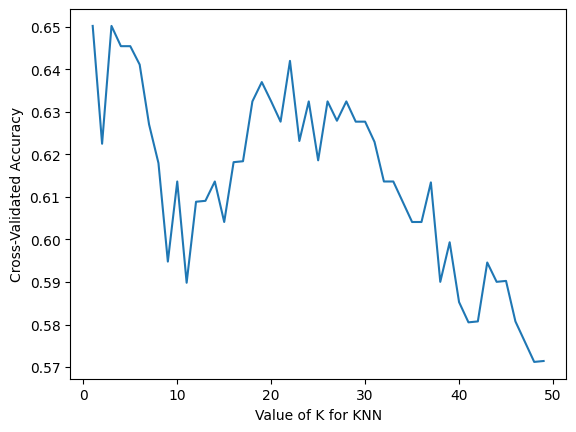

In [ ]:
# visualise cv results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

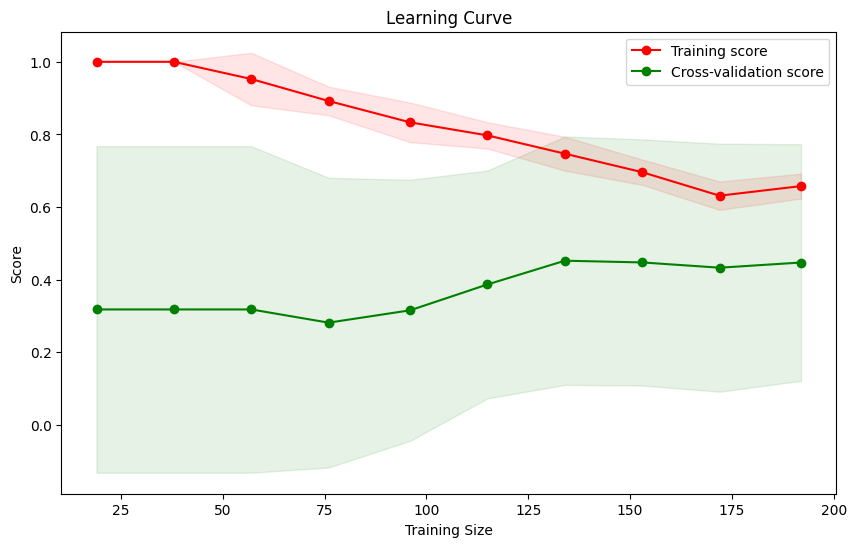

In [30]:
from sklearn.model_selection import learning_curve

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=kfold, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

# Plot error bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

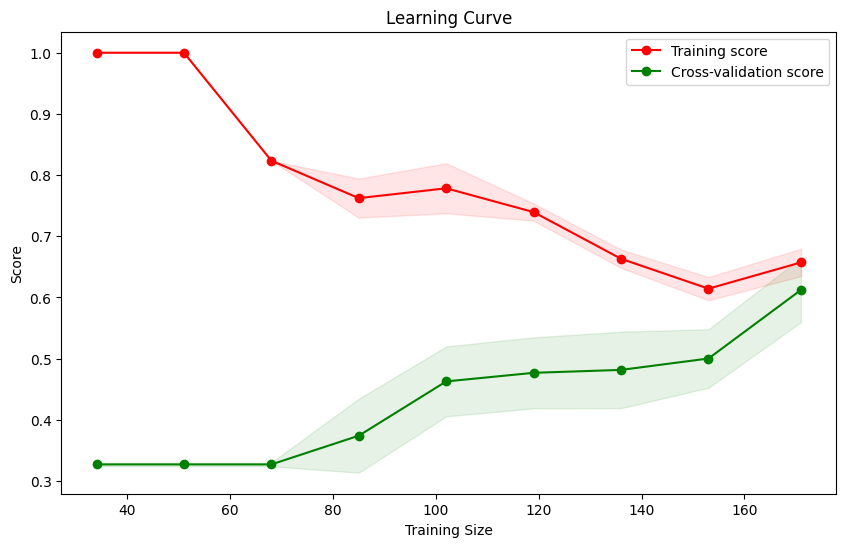

In [24]:
# Learning Curve Plot
from sklearn.model_selection import learning_curve

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

# Plot error bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
model = KNeighborsClassifier(n_neighbors = 1)
results = cross_val_score(model,X,Y,cv = kfold)
print(results)
print(results.mean())

[0.5        0.59090909 0.5        0.81818182 0.38095238 0.66666667
 0.42857143 0.47619048 0.28571429 0.95238095]
0.5599567099567099


In [ ]:
model = KNeighborsClassifier(n_neighbors = 20)
results = cross_val_score(model,X,Y,cv = kfold)
print(results)
print(results.mean())

[0.45454545 0.86363636 0.68181818 0.90909091 0.14285714 0.52380952
 0.47619048 0.         0.0952381  0.        ]
0.4147186147186147


# Zoo

In [31]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo.csv


In [33]:
zoo = pd.read_csv('Zoo.csv')
zoo.sample(10)

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
61     piranha     0         0     1     0         0        1         1   
57    parakeet     0         1     1     0         1        0         0   
23    flamingo     0         1     1     0         1        0         0   
22    elephant     1         0     0     1         0        0         0   
32     gorilla     1         0     0     1         0        0         0   
54     opossum     1         0     0     1         0        0         1   
9         cavy     1         0     0     1         0        0         0   
85    starfish     0         0     1     0         0        1         1   
99        worm     0         0     1     0         0        0         0   
42    ladybird     0         0     1     0         1        0         1   

    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
61        1         1         0         0     1     0     1         0   
57        0         1         1         0     0     2     1         1   
23        0         1         1         0     0     2     1         0   
22        1         1         1         0     0     4     1         0   
32        1         1         1         0     0     2     0         0   
54        1         1         1         0     0     4     1         0   
9         1         1         1         0     0     4     0         1   
85        0         0         0         0     0     5     0         0   
99        0         0         1         0     0     0     0         0   
42        0         0         1         0     0     6     0         0   

    catsize  type  
61        0     4  
57        0     2  
23        1     2  
22        1     1  
32        1     1  
54        0     1  
9         0     1  
85        0     7  
99        0     7  
42        0     6

In [34]:
zoo.shape

(101, 18)

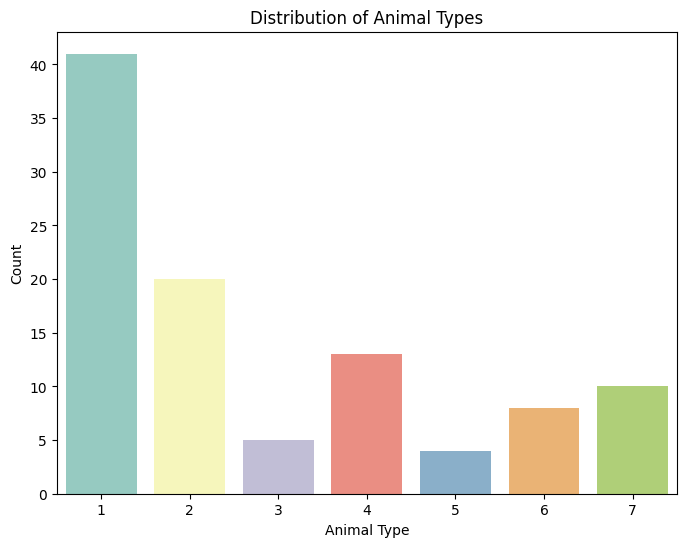

In [35]:
# Distribution of anymal types

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of animal types
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=zoo, palette='Set3')
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

In [ ]:
X = zoo.iloc[:,1:-1]
Y = zoo.iloc[:,-1]

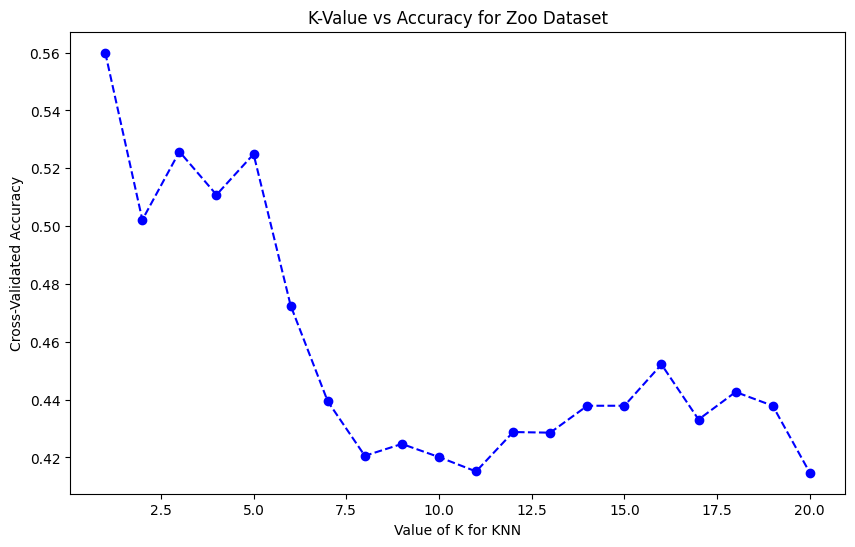

In [38]:
# K-Value vs Accuracy (K-Fold Cross Validation)
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 21)
k_scores = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    results = cross_val_score(model, X, Y, cv=kfold)
    k_scores.append(results.mean())

# Plot K vs Accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='--', color='blue')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K-Value vs Accuracy for Zoo Dataset')
plt.show()

In [ ]:
kfold = KFold(n_splits = 10)

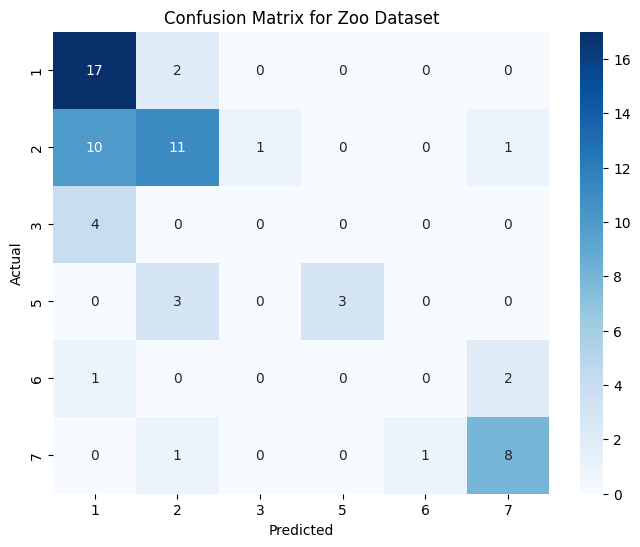

In [39]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train the KNN model
model = KNeighborsClassifier(n_neighbors=12)
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Zoo Dataset')
plt.show()

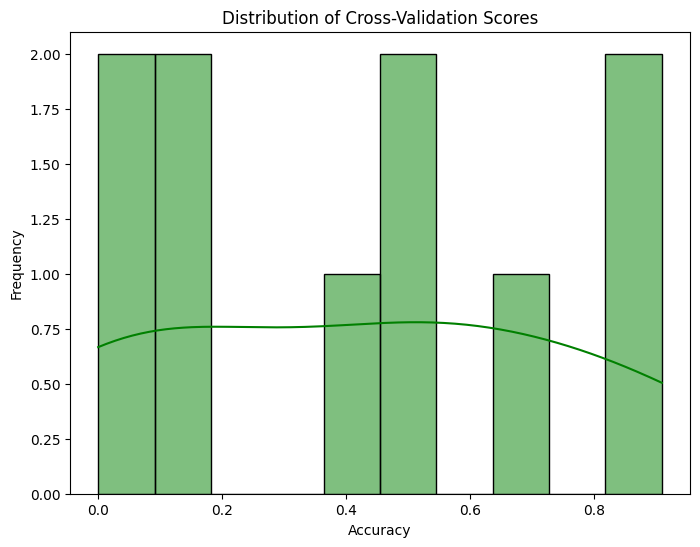

In [41]:
# Cross-Validation Results Distribution
plt.figure(figsize=(8, 6))
sns.histplot(results, kde=True, bins=10, color='green')
plt.title('Distribution of Cross-Validation Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

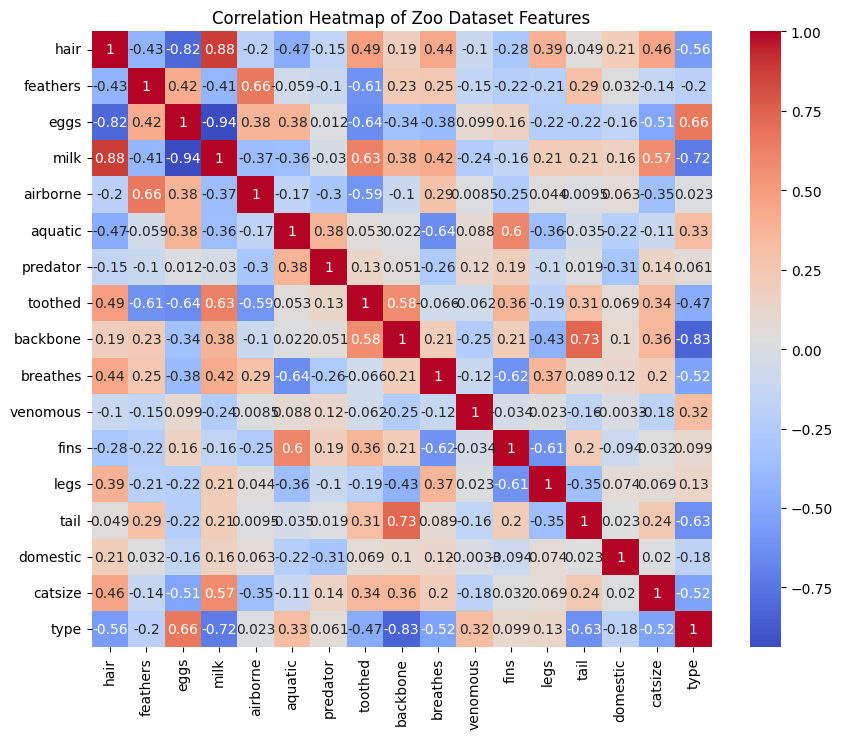

In [42]:
# Feature correlation matrix

import seaborn as sns

# Compute the correlation matrix
corr = zoo.iloc[:, 1:].corr()  # Skip 'animal name'

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Zoo Dataset Features')
plt.show()

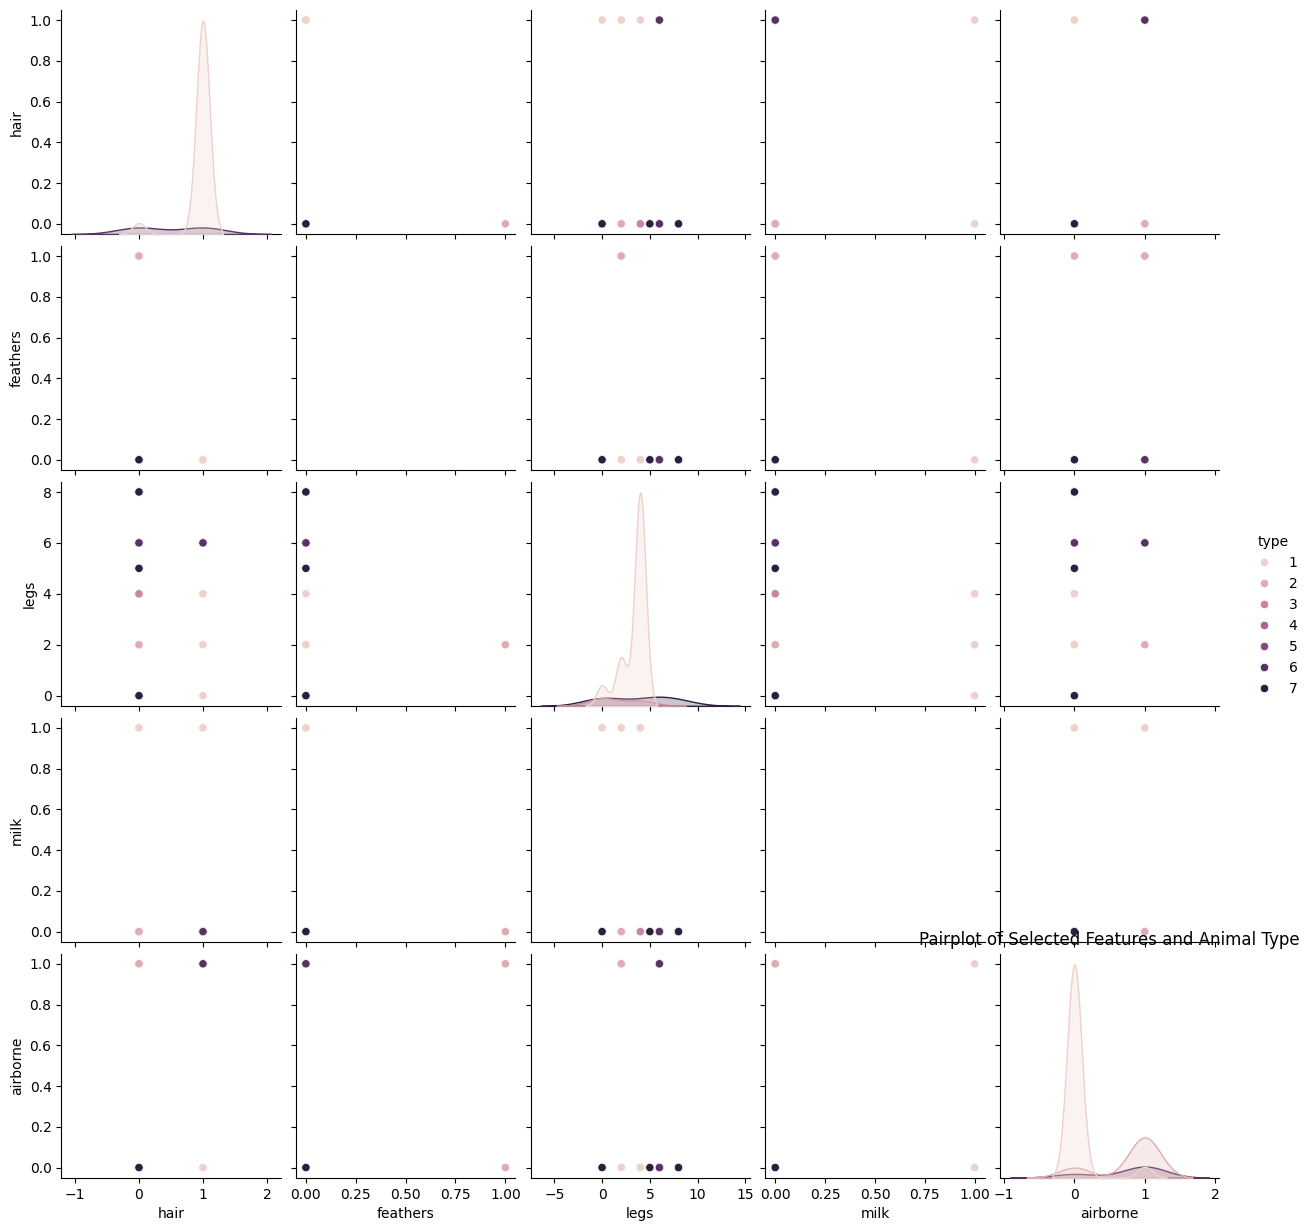

In [43]:
# Pair plot of selected features
sns.pairplot(zoo[['hair', 'feathers', 'legs', 'milk', 'airborne', 'type']], hue='type')
plt.title('Pairplot of Selected Features and Animal Type')
plt.show()

In [ ]:
model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model,X,Y,cv = kfold)
print(results)
print(results.mean())

[1.  0.6 0.8 1.  0.9 0.8 0.8 0.5 0.6 0.8]
0.78


In [ ]:
# Grid Search for n_neighbors tuning
n_neighbors = np.array(range(1,50))
param_grid = dict(n_neighbors = n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


In [ ]:
k_range = range(1, 50)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv = 10)
    k_scores.append(scores.mean())

pd.Series(k_scores).sort_values(ascending = False)

0     0.980000
2     0.950000
1     0.940000
3     0.920000
4     0.880909
5     0.870909
6     0.841818
7     0.811818
15    0.781818
21    0.781818
20    0.781818
19    0.781818
18    0.781818
17    0.781818
16    0.781818
12    0.781818
14    0.781818
13    0.781818
11    0.781818
10    0.781818
9     0.781818
8     0.781818
22    0.771818
23    0.741818
24    0.721818
25    0.702727
27    0.702727
28    0.702727
29    0.702727
30    0.702727
26    0.702727
31    0.692727
32    0.643636
33    0.593636
34    0.593636
39    0.573636
42    0.573636
41    0.573636
40    0.573636
37    0.573636
38    0.573636
36    0.573636
35    0.573636
43    0.563636
44    0.553636
45    0.543636
46    0.543636
47    0.543636
48    0.534545
dtype: float64

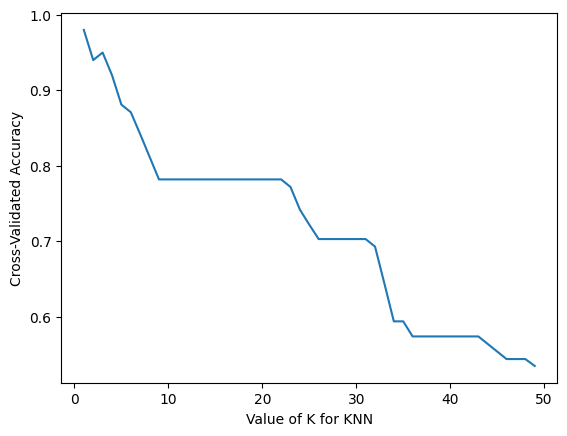

In [ ]:
# visualise cv results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()